In [2]:
#Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

#Read in the data

df = pd.read_csv(r'/Users/varun/Downloads/movies.csv')

In [4]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [6]:
#Looking for Null Values / missing data in the table
#Let's quickly loop through all the columns from the table

for col in df.columns:
    missing_value = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(missing_value*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [8]:
#What are our Data types 

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [16]:
#Changing the data type for columns "budget", "gross", "votes", and "runtime"

#1. budget
df['budget'] = df['budget'].astype('int64')

#2. gross
df['gross'] = df['gross'].astype('int64')

#3. votes
df['votes'] = df['votes'].astype('int64')

#4. runtime
df['runtime'] = df['runtime'].astype('int64')

ValueError: cannot convert NA to integer

In [114]:
#Since the table and the specific columns have NaN values we have to use an alternate approach and that is
#by using ('Int64')

#1. budget
df['budget'] = df['budget'].astype('Int64')

#2. gross
df['gross'] = df['gross'].astype('Int64')

#3. votes
df['votes'] = df['votes'].astype('Int64')

#4. runtime
df['runtime'] = df['runtime'].astype('Int64')

In [22]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,<NA>,NaN,90
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,<NA>,<NA>,Cactus Blue Entertainment,90
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,<NA>,Embi Productions,<NA>
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,<NA>,James Randall,James Randall,Christina Roz,United States,15000,<NA>,NaN,120


In [76]:
#Filling all the NaN values with 0

df = df.fillna(0)

In [80]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,0,Drama,2020,"October 23, 2020 (United States)",3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,0,90
7664,Dream Round,0,Comedy,2020,"February 7, 2020 (United States)",4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90
7665,Saving Mbango,0,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0
7666,It's Just Us,0,Drama,2020,"October 1, 2020 (United States)",0.0,0,James Randall,James Randall,Christina Roz,United States,15000,0,0,120


In [28]:
#Checking for duplicate values 

df.duplicated().any()

False

In [30]:
#Double checking for any duplicate values

df[df.duplicated()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime


In [82]:
#Ordering the table by "gross" column

df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4.5,274,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,1300,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89
1601,My Twentieth Century,0,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104


In [118]:
#Adjusting the data discrepancy in "year". Since the column year and released have different values, aligning them into released_year

df['released_year']= df['released'].astype(str).str.extract(r'(\d{4})')[0]

In [90]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,0,Drama,2020,"October 23, 2020 (United States)",3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,0,90,2020
7664,Dream Round,0,Comedy,2020,"February 7, 2020 (United States)",4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90,2020
7665,Saving Mbango,0,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0,2020
7666,It's Just Us,0,Drama,2020,"October 1, 2020 (United States)",0.0,0,James Randall,James Randall,Christina Roz,United States,15000,0,0,120,2020


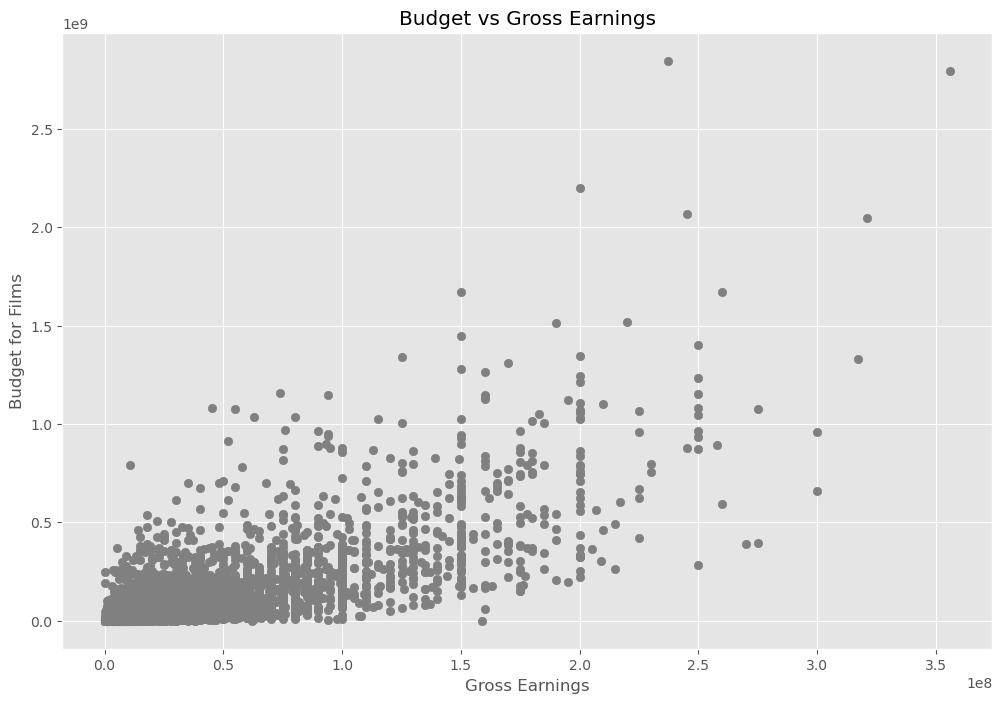

In [56]:
#Let's plot a scatter plot for budget vs gross

plt.scatter(x=df['budget'], y=df['gross'], color="gray")

plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Films')

plt.show()

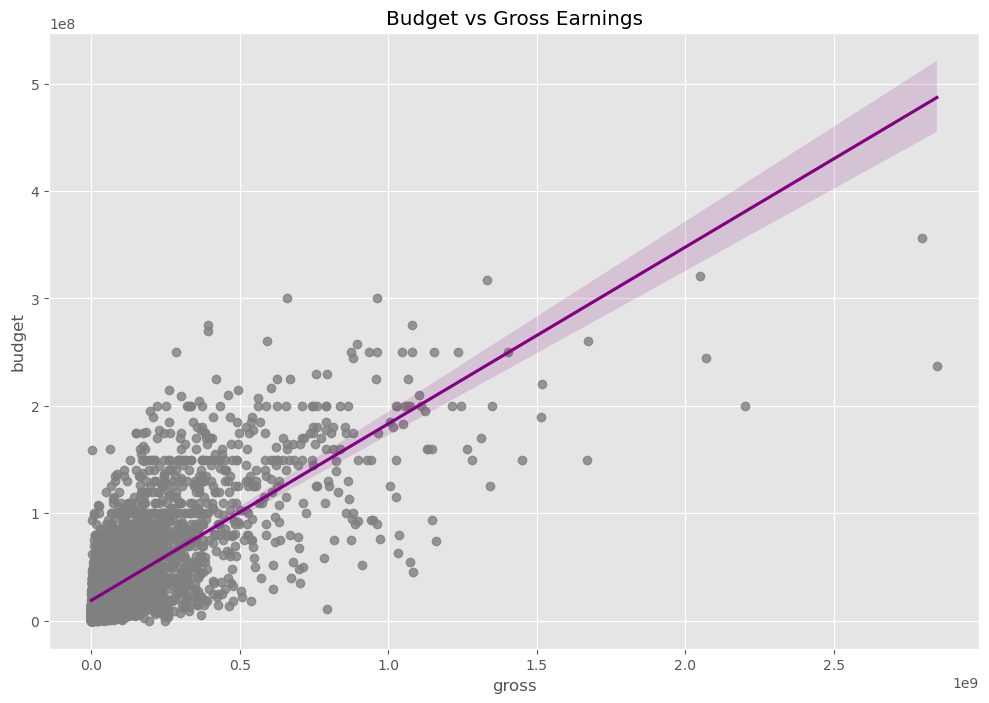

In [46]:
#Since we cannot tell that the budget is directly correlated to gross, 
#we will draw a scatter plot with the help of seaborn to help us visualize better

plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Films')

sns.regplot(x= 'gross', y='budget', data= df, scatter_kws={"color":"gray"}, line_kws={"color":"purple"})

plt.show()

In [62]:
#Let's look at the actual correlation

df.corr(numeric_only= True) #pearson, kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


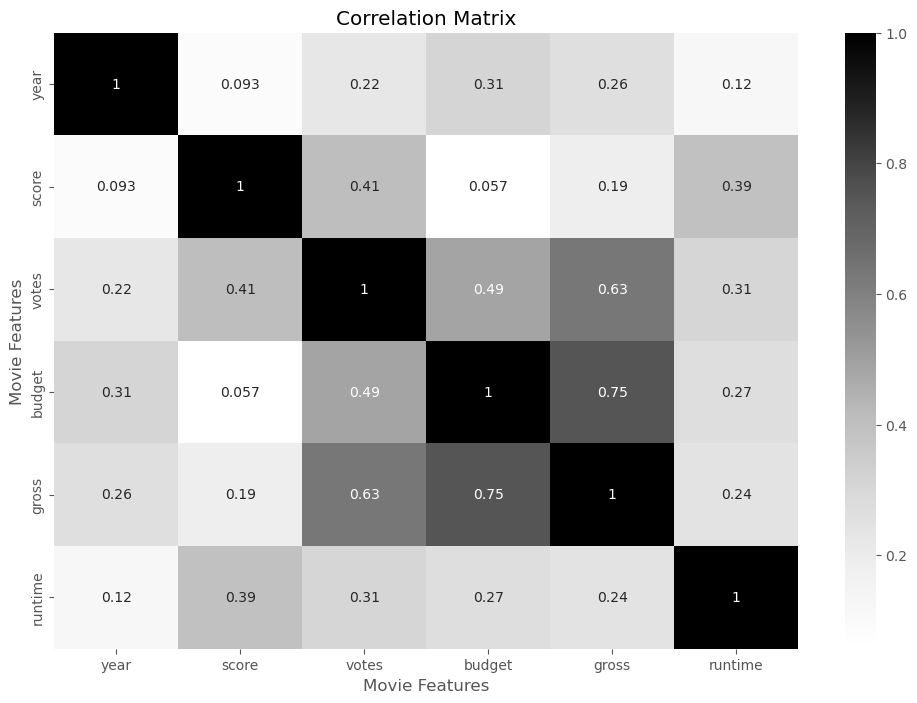

In [112]:
#High correlation between budget and gross by visualizing a heatmap using correlation_matrix

correlation_matrix= df.corr(numeric_only= True)
sns.heatmap(correlation_matrix, annot= True, cmap="Greys")

plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

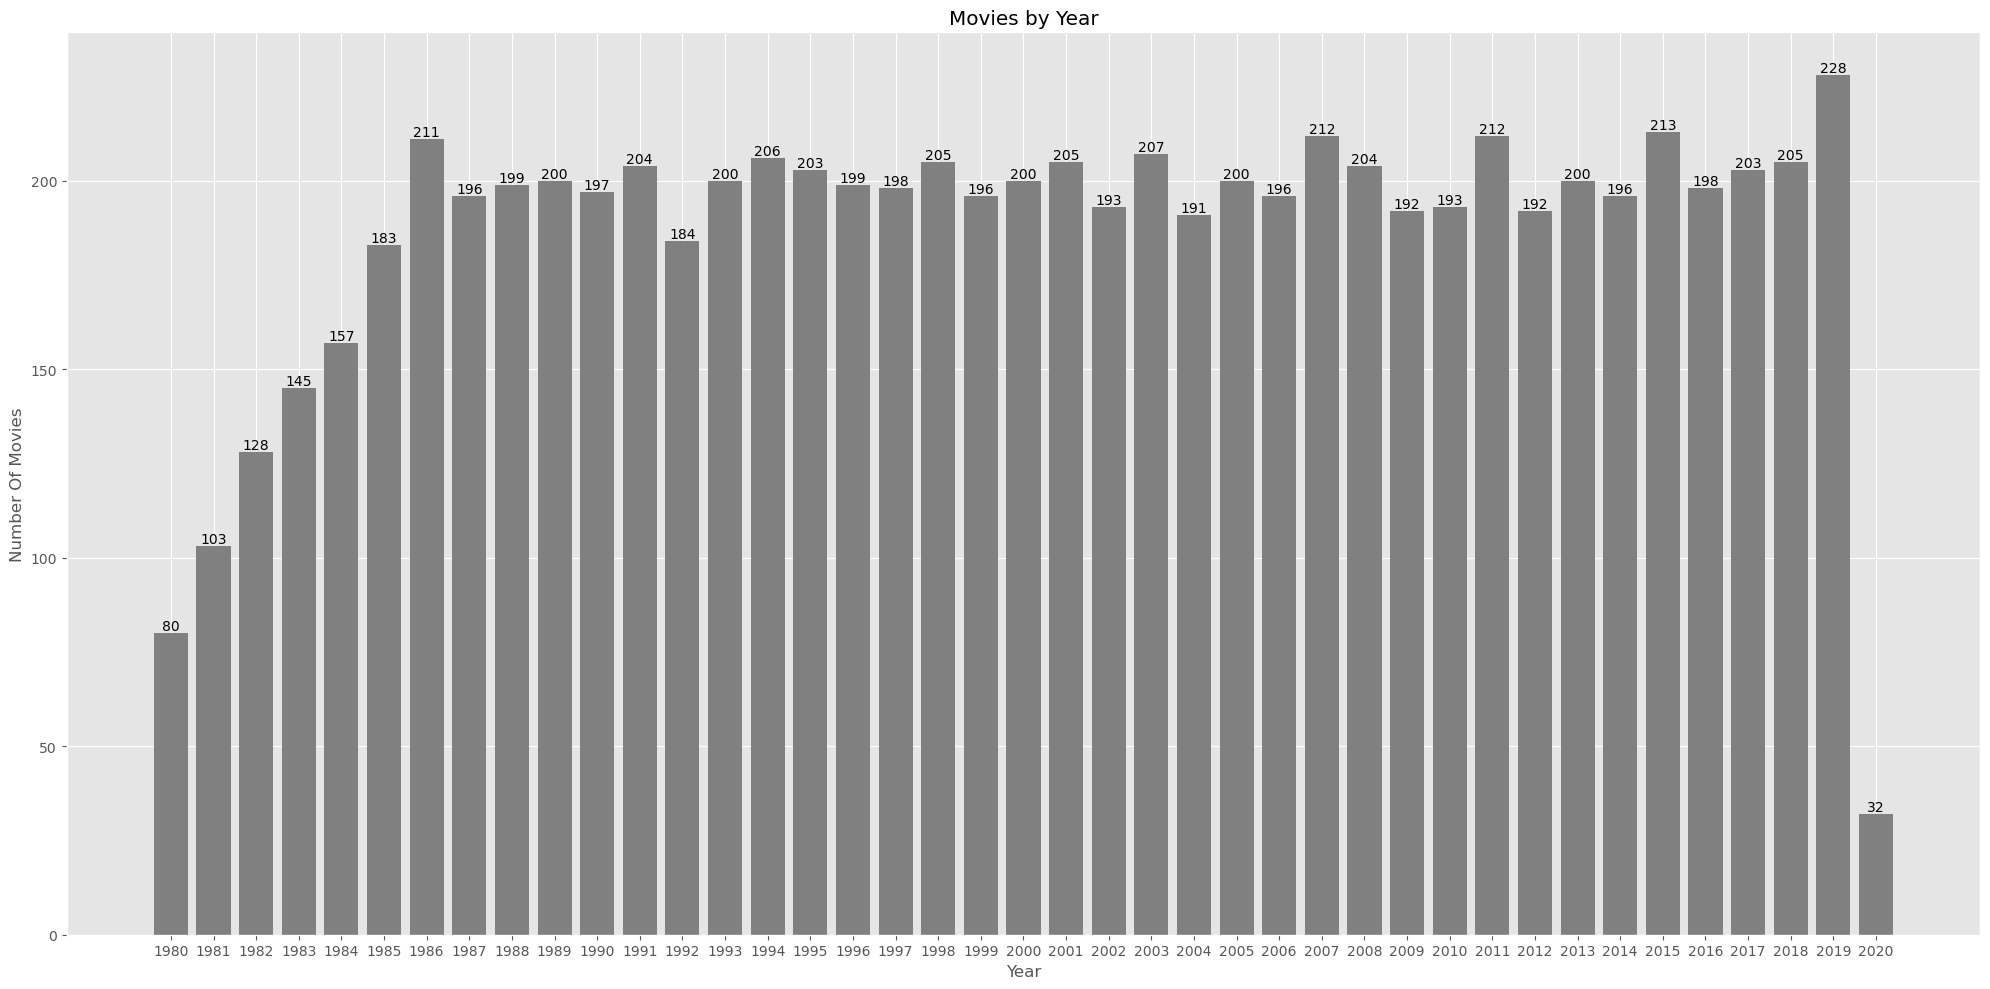

In [98]:
#Now lets check the number of movies released per year
year= df["released_year"].value_counts().sort_index()

#Data
x= year.index
y= year.values

#Create figure and setting size
plt.figure(figsize= (20,10))

#Creating a bar graph
bars= plt.bar(x,y, color="gray")

#Adding Labels and titles
plt.xlabel('Year')
plt.ylabel('Number Of Movies')
plt.title('Movies by Year')

#Add value on top of the bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), 
             ha='center', va='bottom') #where ha and va are horizontal and vertical alignment

#Adjusting layout to fit everything neatly
plt.tight_layout()

plt.show()

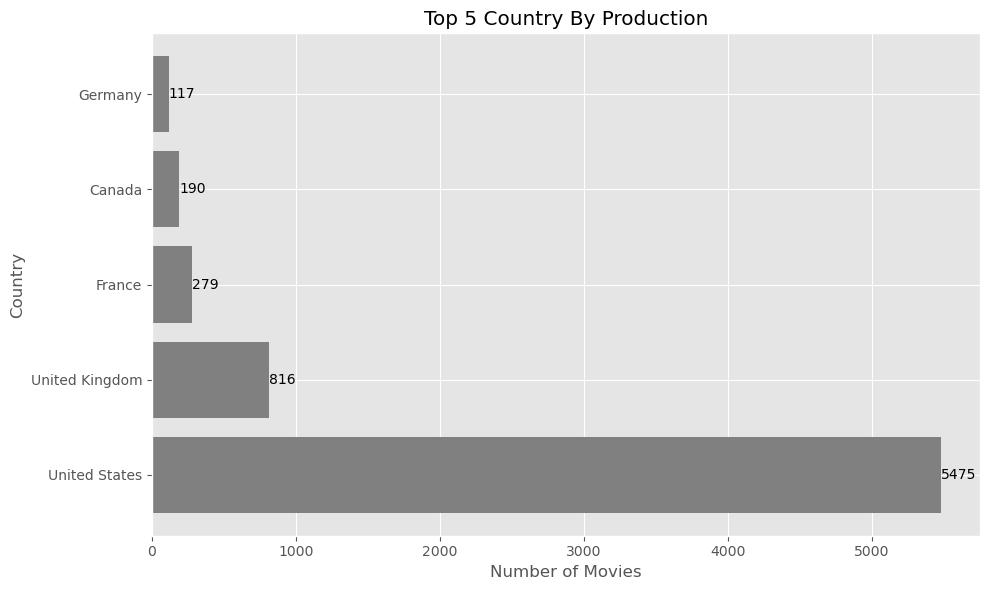

In [106]:
#Checking number of movies per country

country = df["country"].value_counts().sort_values(ascending=False).head(5)
country.head()

#Data
y = country.index
x = country.values

#Create figure and setting size
plt.figure(figsize= (10,6))

#Create the horizontal bar plot
bars = plt.barh(y, x, color="gray")

#Adding labels and title
plt.xlabel('Number of Movies')
plt.ylabel('Country')
plt.title('Top 5 Country By Production')

#Adding value labels on each bar
plt.bar_label(bars)

#Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

In [124]:
#There are a ton of other things we can do with this dataset, but I have highlighted some of the top
#few things that can be done with this movie dataset :)